In [1]:
#  lags: the number of lags to show the autocorrelation of data points at;
# the autocorrelation of values which are N/lags periods apart is.
# plot_acf() : statsmodels function to inspect which lags have a strong correlation to the forecasted value,
# this plot shows how much each previous lag influences the future lag.
# dataset : electric production 

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
df = pd.read_csv('Electric_Production.csv')
df['DATE']= pd.to_datetime(df['DATE'])
df

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


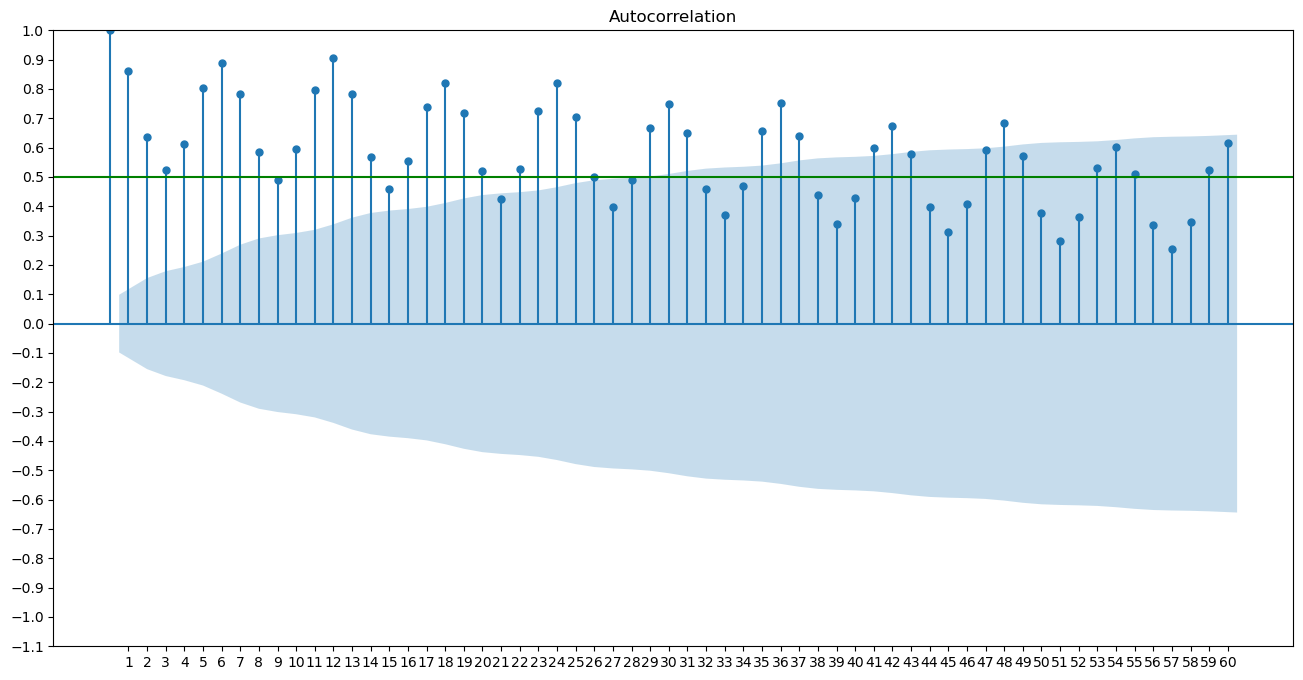

In [2]:
fig, ax = plt.subplots(figsize=(16,8))
# nlags= 10 *log10(N) ≈ 60, N: dataset length; show autocorrelations at nlags
plot_acf(df['Value'], lags=60, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(-1.1, 1.1, 0.1))
plt.xticks(np.arange(1, 61, 1))
plt.axhline(y=0.5, color="green")
plt.show()

# high positive autocorelation (above the threshold :0.5 ) of data points till  lag 60

In [3]:
# splitting dataset into train and test
train_data = df['Value'].iloc[:-50]
test_data = df['Value'].iloc[-50:]
len(train_data)
from statsmodels.tsa.ar_model import AutoReg
# The number of lags to include in the model 
model = AutoReg(train_data, lags=60).fit()

In [4]:
# evaluating autoregressive model 
forecasts = model.forecast(50).tolist()
test_values = test_data.tolist()

# evaluate the model using MAPE metric
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(test_values, forecasts))
# obviously, the error is about 3%

0.028449641966619997


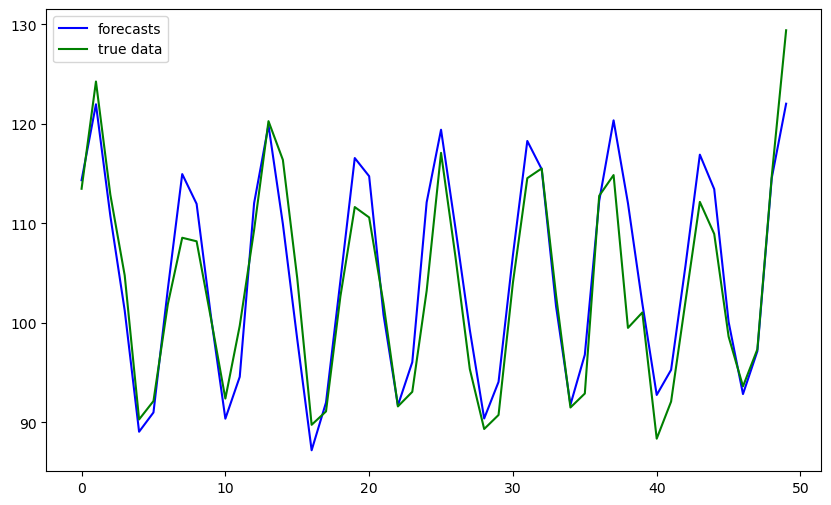

In [5]:
#To get a visual idea of how accurate the forecasts against true data are,
# we can plot both the forecasts and the test data to see how close the curves seem
fig = plt.subplots(figsize=(10,6))
plt.plot(forecasts, color="blue", label ='forecasts')
plt.plot(test_values,color="green", label ='true data')
plt.legend(loc="upper left")
plt.show()
# both curves seem to in agreement with each other

In [6]:
# re-build model with different lags values:100, 10
model1 = AutoReg(train_data, lags=100).fit()
model2=  AutoReg(train_data, lags=10).fit()
# evaluating autoregressive model 
forecasts1 = model1.forecast(50).tolist()
forecasts2 = model2.forecast(50).tolist()
test_values = test_data.tolist()

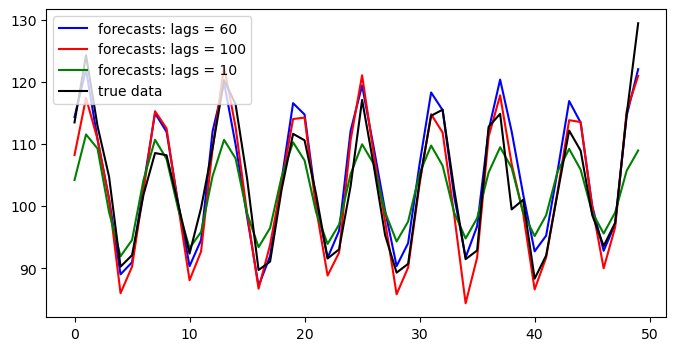

In [7]:
# plot the curves against each other 

fig = plt.subplots(figsize=(8,4))
plt.plot(forecasts, color="blue", label ='forecasts: lags = 60')
plt.plot(forecasts1, color="red", label ='forecasts: lags = 100')
plt.plot(forecasts2, color="green", label ='forecasts: lags = 10')
plt.plot(test_values,color="black", label ='true data')
plt.legend(loc="upper left")
plt.show()
   

In [8]:
# AutoRegressive Integrated Moving Average(ARIMA)  is a time series forecasting model that incorporates autocorrelation measures
# to model temporal structures within the time series data to predict future values.
# The autoregression part of the model measures the dependency of a particular sample with a few past observations. 
# These differences are measured and integrated to make the data patterns stationary or
# minimize the obvious correlation with past data (collinearity or linear dependence)
# (since linear independence and no collinearity is one of the fundamental assumptions of the linear regression model).
# After this, a moving average helps condense and bring out significant features from the data.
# stationary time series is Consequently, parameters such as mean and variance also do not change over time.
# Thus, time series with trends, or with seasonality, are not stationary,
# because trenda and seasonality affect the time series at different time points.
# ARIMA equation :y′t = c + ϕ1y′t−1 + ⋯ + ϕpy′t−p + θ1εt−1 + ⋯ + θqεt−q + εt

# we will be using Store_sale time series dataset: 
# https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data
# first we check if the data is stationary using the Augmented Dickey Fuller test (adfuller()),from the statsmodels package.
from statsmodels.tsa.stattools import adfuller
from numpy import log
import pandas as pd
df2 = pd.read_csv('Store_sales_train.csv',parse_dates=['date'])

#df2['date'] = pd.to_datetime(df2['date'])
df2 = pd.DataFrame(df2, columns=['date','sales', 'family']).set_index('date')
df2.index = pd.DatetimeIndex(df2.index).to_period('D')
df2 = df2[df2.sales != 0]
df2 = df2[df2.family == 'BEAUTY']
df2 = df2.groupby(level=0).sum()
## remove Family column
df = pd.DataFrame(df2, columns=['sales'])

result = adfuller(df)
print('ADF Statistic: %f' % result[0])
print('p-value: %s' % result[1])
df


ADF Statistic: -1.773219
p-value: 0.39383653785330297


C:\Users\la2022\AppData\Local\Temp\ipykernel_17244\4186456414.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df2.groupby(level=0).sum()


,sales
date,
2013-01-01,2.0
2013-01-02,207.0
2013-01-03,125.0
2013-01-04,133.0
2013-01-05,191.0
...,...
2017-08-11,351.0
2017-08-12,369.0
2017-08-13,433.0


In [9]:
# import time series data
df2 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

df2.head(5)
#df2['date'] = pd.to_datetime(df2['date'])
df2 = pd.DataFrame(df2).set_index('date')
df2.index = pd.DatetimeIndex(df2.index).to_period('M')
# The null hypothesis of the ADF test is that the time series is non-stationary.
#So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and
#infer that the time series is indeed stationary.

result = adfuller(df2.value)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# p-value is higher than significae level 0.05 > there is no reason to reject null_hypothesis and thus the data is non stationary,
# with non stationary data, ARIMA can not be applied;use differencing


ADF Statistic: 3.145186
p-value: 1.000000


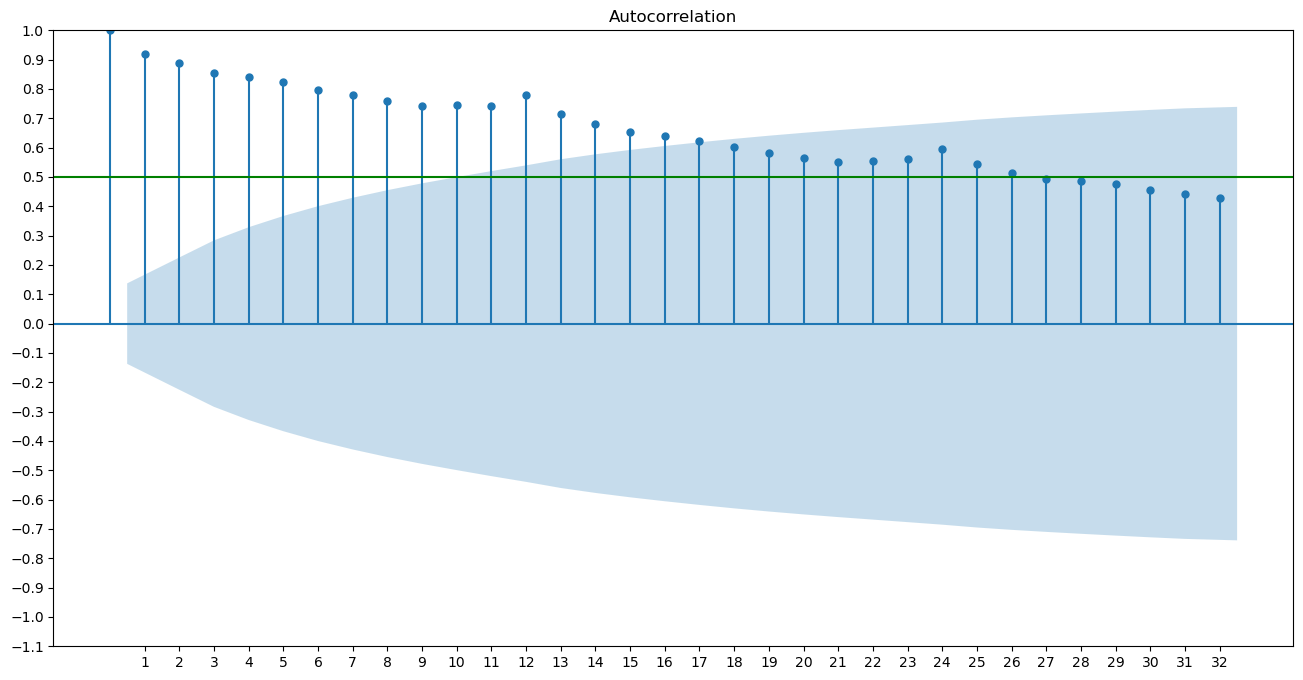

In [17]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
fig, ax = plt.subplots(figsize=(16,8))
# nlags= 10 *log10(N) ≈ 32, N: dataset length; show autocorrelations at nlags
plot_acf(df2,lags=32,  ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(-1.1, 1.1, 0.1))
plt.xticks(np.arange(1, 33, 1))
plt.axhline(y=0.5, color="green")
plt.show()
# we always ignore the long spike at lag 0, we look from lag 1 on ..

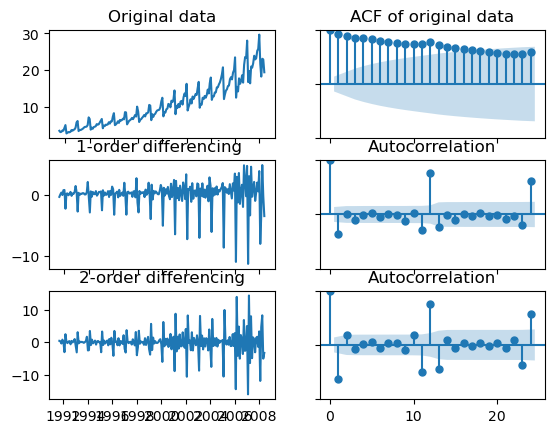

In [14]:
# tuning p, d, q 
# p is the order of the AR term
# q is the order of the MA term
# d is the order of differencing required to make the time series stationary
# time Series original acf plot

df1 = df2.to_timestamp()
figure, axis = plt.subplots(3, 2)
axis[0, 0].plot(df1)
axis[0, 0].set_title('Original data')
# default number of lags are considered
plot_acf(df2, ax=axis[0, 1])
axis[0, 1].set_title('ACF of original data')
axis[1, 0].plot(df1.diff())
axis[1, 0].set_title('1-order differencing ')
plot_acf(df2.diff().dropna(), ax=axis[1, 1])

axis[2, 0].plot(df1.diff().diff())
axis[2, 0].set_title('2-order differencing')
plot_acf(df2.diff().diff().dropna(), ax=axis[2, 1])
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axis.flat:
    ax.label_outer()
# we will stop at first differencing since autocorrelation doesn't decrease afterthat.     

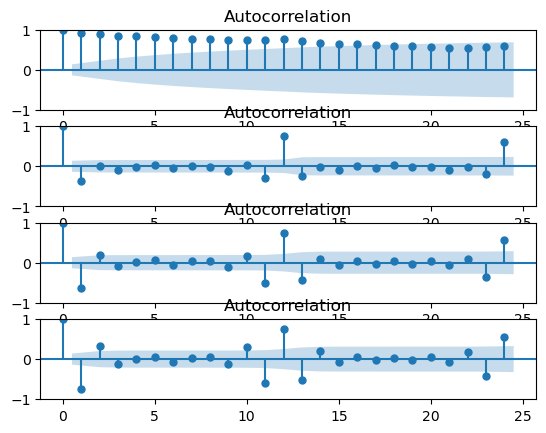

In [20]:
figure, (ax1, ax2, ax3, ax4) = plt.subplots(4)
plot_acf(df2, ax=ax1)
#add semicolon to suppress plotting returned output twice 
plot_acf(df2.diff().dropna(), ax=ax2);
plot_acf(df2.diff().diff().dropna(), ax=ax3);
plot_acf(df2.diff().diff().diff().dropna(), ax=ax4);

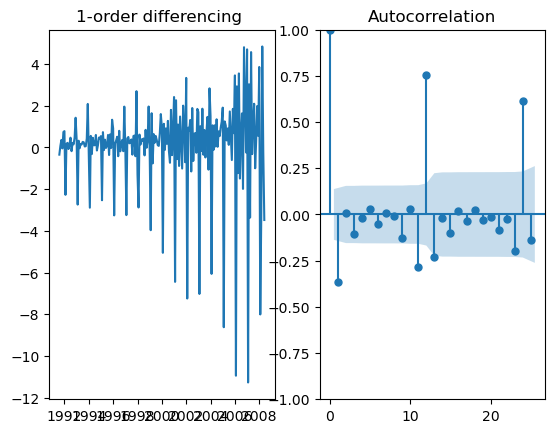

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(df1.diff().dropna())
ax1.set_title('1-order differencing ')
plot_acf(df2.diff().dropna(),lags=25, ax=ax2);

C:\Users\la2022\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


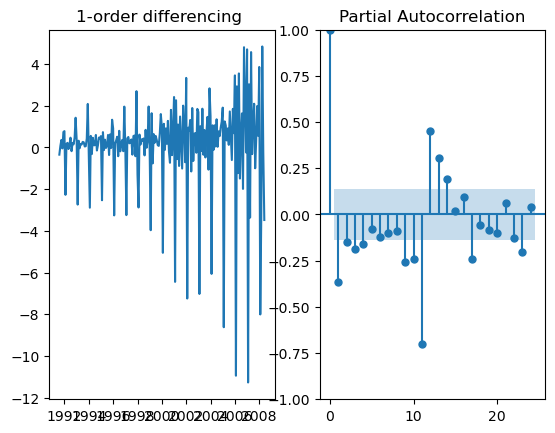

In [23]:
# AR term: p, You can find out the required number of AR terms
# by inspecting the Partial Autocorrelation (PACF) plot.
# Partial autocorrelation can be imagined as the correlation between the series and its lag,
# after excluding the contributions from the intermediate lags.

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(df1.diff().dropna());
ax1.set_title('1-order differencing ')
plot_pacf(df2.diff().dropna(), ax=ax2);
# pacf starts from lag 1, so we should look at the first lag in plot
# the blue region is the significance threshold
# there is cutoff at lag 2, so we choose p=1

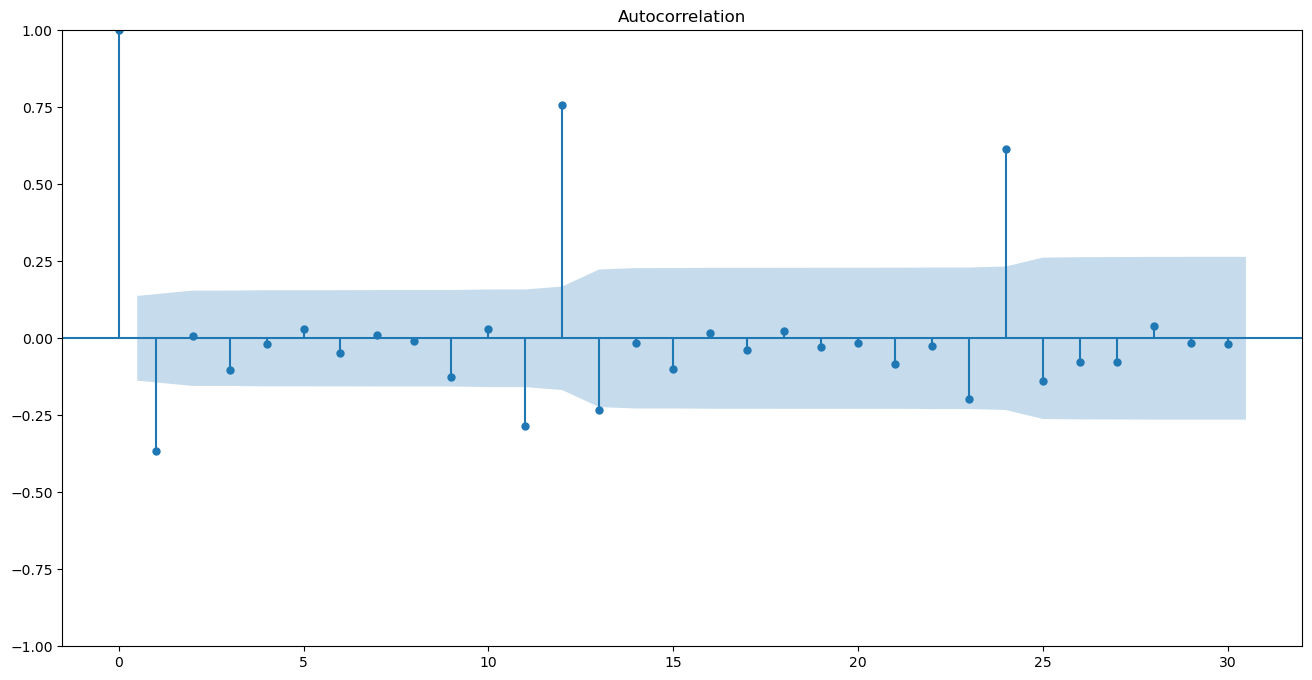

In [24]:
# MA term q :  from the ACF plot we decide the value of q.
# An MA term is technically, the error of the lagged forecast.
# The ACF tells how many MA terms (lags) are required to remove any autocorrelation in the stationarized series.

fig, ax = plt.subplots(figsize=(16,8))
plot_acf(df2.diff().dropna(),lags=30, ax=ax);
# this plot indicates that after lag=24 the autocorrelation gets obviously insignificant

In [25]:
# arima: order(p,d,q),  p is the order (number of time lags) of the autoregressive model
from statsmodels.tsa.arima.model import ARIMA

# 1,1,24 ARIMA Model
model = ARIMA(df2, order=(1,1,24))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\la2022\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  204
Model:                ARIMA(1, 1, 24)   Log Likelihood                -310.453
Date:                Wed, 18 Oct 2023   AIC                            672.907
Time:                        17:15:51   BIC                            759.050
Sample:                    07-31-1991   HQIC                           707.757
                         - 06-30-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5384      0.138     -3.893      0.000      -0.809      -0.267
ma.L1         -0.1004      0.672     -0.149      0.881      -1.417       1.216
ma.L2         -0.3508      0.414     -0.847      0.3

C:\Users\la2022\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


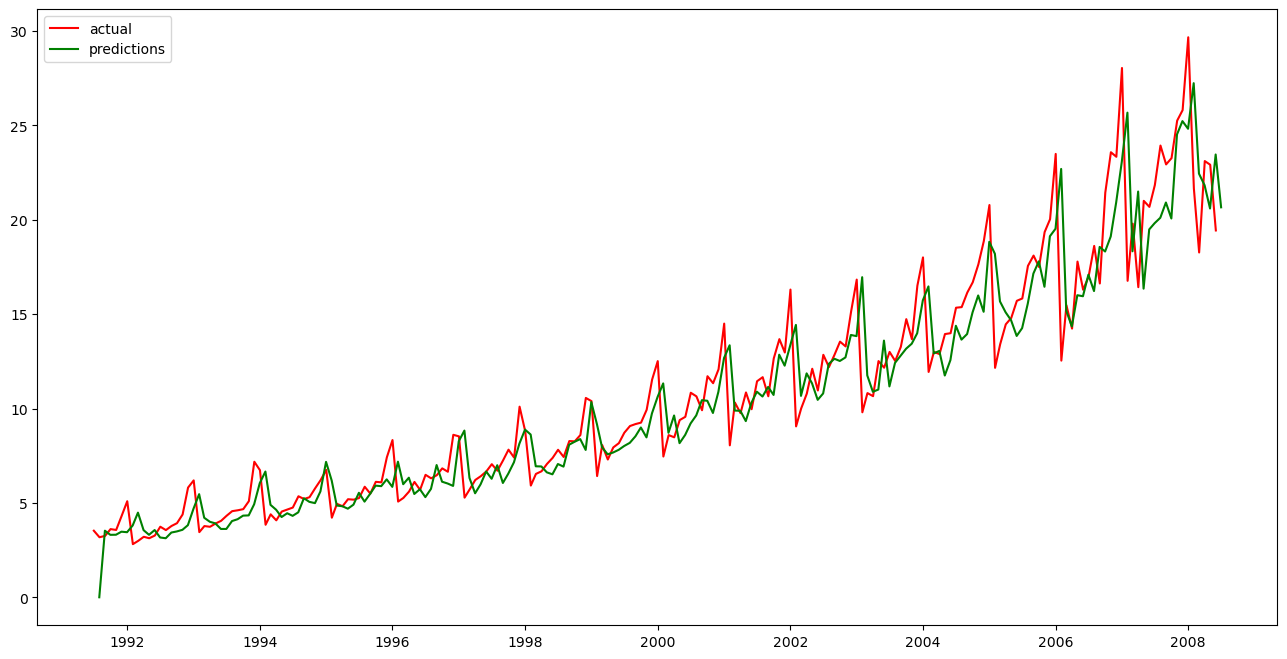

In [26]:
# Actual vs Fitted
from sklearn.metrics import mean_absolute_percentage_error
fig, ax = plt.subplots(figsize=(16,8))
#pred= model_fit.forecast(steps= 100, dynamic=False)
# in sample predictions: predict() After a model has been fit predict returns the fitted values.
pred= model_fit.predict( dynamic=False)

#df1 = df.to_timestamp()
plt.plot(df1, label ='actual',color='r')
plt.plot(pred,color='g',label= 'predictions')
plt.legend(loc="upper left")
plt.show()

In [ ]:
mape = mean_absolute_percentage_error(df2, pred)
mape

C:\Users\la2022\AppData\Local\Temp\ipykernel_17244\3493184615.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


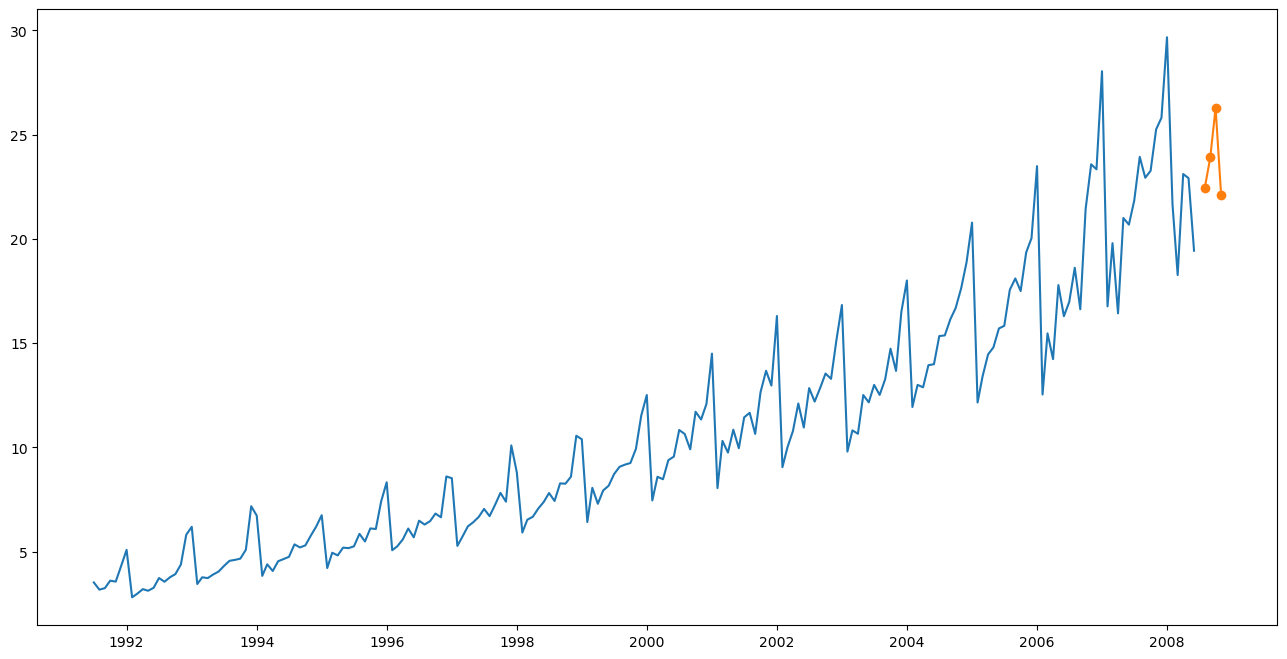

In [27]:
#out of samples forecasts

from pandas import datetime
#start_index = datetime(2008, 7)
#end_index = datetime(2008, 12)
forecasts = model_fit.forecast(steps=4)
fig, ax = plt.subplots(figsize=(16,8))
# convert from period into timestamp

plt.plot(df1, label ='true data')
plt.plot(forecasts, label='forecasts',  marker='o')
plt.show()
